
# Missing category imputation
is a technique used to handle missing values in categorical variables by creating a separate category or label to represent the missing values. Instead of imputing a specific value or using statistical measures, missing values are treated as a distinct category in the variable.

In this approach, a new category is introduced in the categorical variable specifically to capture the missingness. This new category is typically labeled as "Missing," "Unknown," or something similar to indicate that the value is not available or not recorded. By creating a separate category, missing category imputation allows for the preservation of the missingness information.

Missing category imputation is useful when the missing values in the categorical variable carry meaningful information or when imputing specific values could introduce bias or distort the interpretation. It avoids assumptions about the true underlying value of the missing data and provides a transparent way to handle missingness.

However, it's important to note that missing category imputation may have implications for subsequent analysis or modeling. The inclusion of the missing category can affect the distribution, relationships, and predictive power of the categorical variable. Therefore, it is essential to carefully consider the impact of the missing category on the specific analysis task and to appropriately account for it during data analysis or modeling.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("train.csv", usecols = ["GarageQual", "FireplaceQu", "SalePrice"])

In [7]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [8]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [9]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

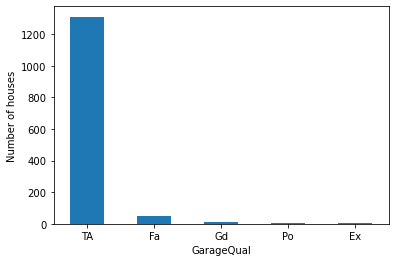

In [17]:
df["GarageQual"].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.xticks(rotation=0)
plt.ylabel("Number of houses")

In [18]:
df["GarageQual"].fillna("Missing", inplace=True)

In [19]:
df.isnull().sum()

FireplaceQu    690
GarageQual       0
SalePrice        0
dtype: int64

Text(0, 0.5, 'Number of houses')

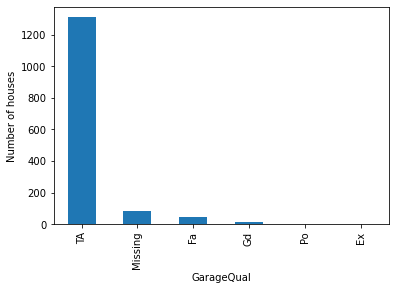

In [20]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

# Doing the same work but with sklearn

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [23]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

imputer.statistics_

array(['Missing', 'Missing'], dtype=object)